In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import json
from twython import Twython
import time

Code below has scraped *all* of Mike Gravel's followers for June 21, 2019

In [13]:
# Code below adapated from: https://stackabuse.com/accessing-the-twitter-api-with-python/
# Load Twitter API credentials from json file
with open("twitter_credentials.json", "r") as file:  
    creds = json.load(file)

# Instantiate an object and provide Twitter credentials
twitter = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET_KEY'], creds['ACCESS_TOKEN'], creds['ACCESS_SECRET_TOKEN'])

In [14]:
def get_followers_json(username):
    # create empty dictionary to accept data
    dict_fol = {'screen_name': [], 'verified': [], 'location': [], 'followers_count': [], 'tweet_text': [], 'retweet_count': [], 'favorite_count': []}  

    # we don't want to dump directly to the graph because we'll get a giant hairball
    # we will want to filter for users with more followers before moving to depth=2 of the social network
    #create loop to page through API results without hitting rate limit
    next_cursor = -1
    timeout = time.time() + 60*60*12 #creates a hard end time for the script to run (12 hrs)

    while(next_cursor):
        if time.time() > timeout: 
            break #ends loop after timeout period
        get_followers = twitter.get_followers_list(screen_name='mikegravel', count = 200, cursor=next_cursor)
        for user in get_followers['users']:  
            dict_fol['screen_name'].append(user['screen_name'])
            dict_fol['verified'].append(user['verified'])
            dict_fol['followers_count'].append(user['followers_count'])
            
            try:
                dict_fol['location'].append(user['location'])
            except:
                dict_fol['location'].append(None) #many users leave this blank
            
            try:
                dict_fol['tweet_text'].append(user['status']['text'])
            except:
                dict_fol['tweet_text'].append(None) #a good number of users have no tweets!
            
            try:
                dict_fol['retweet_count'].append(user['status']['retweet_count'])
            except:
                dict_fol['retweet_count'].append(None)
            
            try:
                dict_fol['favorite_count'].append(user['status']['favorite_count']) 
            except:
                dict_fol['favorite_count'].append(None)
                
        try: 
            time.sleep(65)
            next_cursor = get_followers["next_cursor"]
            print("Getting more of tweets of %s's followers" % username)
            print (time.asctime())
        except:
            break
  

    filename=username + str(time.time()) + "_followers.json"
    
    with open(filename, "w") as file:
        json.dump(dict_fol, file)
        
    print("Saving %s's followers' tweets to JSON file" % username)
    print (time.asctime())
    return dict_fol

In [18]:
get_followers_tweets = get_followers_json('mikegravel')

Getting more of tweets of mikegravel's followers
Fri Jul 12 09:25:37 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:26:44 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:27:50 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:28:56 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:30:03 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:31:09 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:32:15 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:33:22 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:34:29 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:35:34 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:36:41 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:37:47 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 09:38:53 2019
Getting more of tweets of mikegravel's

Getting more of tweets of mikegravel's followers
Fri Jul 12 11:27:41 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:28:47 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:29:52 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:30:58 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:32:04 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:33:10 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:34:16 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:35:22 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:36:27 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:37:33 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:38:39 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:39:45 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 11:40:51 2019
Getting more of tweets of mikegravel's

Getting more of tweets of mikegravel's followers
Fri Jul 12 13:41:51 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:42:57 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:44:02 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:45:08 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:46:14 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:47:20 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:48:26 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:49:32 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:50:38 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:51:44 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:52:50 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:53:56 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 13:55:01 2019
Getting more of tweets of mikegravel's

Getting more of tweets of mikegravel's followers
Fri Jul 12 15:58:14 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 15:59:20 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:00:26 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:01:32 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:02:38 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:03:44 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:04:50 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:05:56 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:07:02 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:08:08 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:09:14 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:10:20 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 16:11:27 2019
Getting more of tweets of mikegravel's

Getting more of tweets of mikegravel's followers
Fri Jul 12 18:00:22 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:01:29 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:02:35 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:03:41 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:04:47 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:05:53 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:06:59 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:08:05 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:09:12 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:10:18 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:11:24 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:12:30 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 18:13:36 2019
Getting more of tweets of mikegravel's

Getting more of tweets of mikegravel's followers
Fri Jul 12 20:02:35 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:03:41 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:04:47 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:05:53 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:06:59 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:08:05 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:09:10 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:10:16 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:11:22 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:12:28 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:13:34 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:14:41 2019
Getting more of tweets of mikegravel's followers
Fri Jul 12 20:15:46 2019
Getting more of tweets of mikegravel's

In [4]:
with open('mikegravel1561157054.0137448_followers.json') as file:
    mgfol = json.load(file)

In [5]:
df = pd.DataFrame.from_dict(mgfol)
df = df.sort_values(by='followers_count', ascending=False)

In [6]:
mgfol.keys()

dict_keys(['screen_name', 'verified', 'location', 'followers_count', 'tweet_text', 'retweet_count', 'favorite_count'])

In [9]:
df['tweet_text'].value_counts()

RT @thejalatucker: If you DID NOT learn about Juneteenth in school, RT this, I’m really trying to see something.                                    365
RT @MikeGravel: Remember for a moment that we live in a country where one idiotic, authoritarian man has unilateral control of whether we e…        145
RT @IlhanMN: Just as in Iraq, aggressors are using illegitimate pretexts to beat the drums of war.\n\nJust as in Iraq, our media is taking th…      138
RT @dril: age 0 (baby): I want my Dada .\nage 25 (Millennial): I want my Data\nDo you see how fucked this is?                                       110
RT @BernieSanders: The cat is out of the bag. The corporate wing of the Democratic Party is publicly "anybody but Bernie." They know our pr…        107
RT @jtlevy: “You can’t make Hitler analogies until there are at least six million dead” say people who make Stalin analogies when the top m…         97
RT @mdb2: Bernie: “I think that there are a certain number of people who would like to s

In [40]:
import nltk
from nltk.tokenize import TweetTokenizer
import re

In [37]:
# Create a wordcloud of the tweets
tknzr = TweetTokenizer()
tweets = df['tweet_text'].fillna("").astype('str')
all_tweets = ' '.join(tweets)
corpus_list = tknzr.tokenize(all_tweets)
corpus = ' '.join(corpus_list)

In [53]:
#add stopwords to filter out links, retweets
new_stop = ["https", "http", "RT", "co", "com", "us"] #co, com, and us are common endings in the links
for word in new_stop:
    STOPWORDS.add(word)

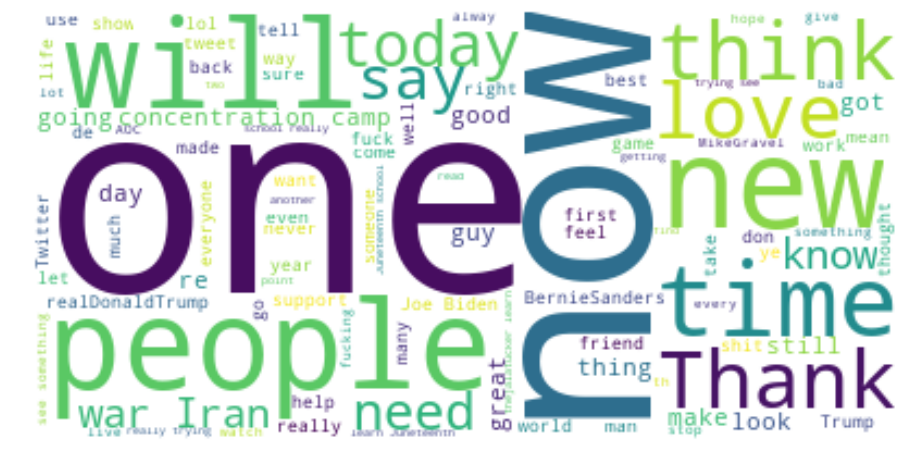

In [54]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_words=100, background_color="white").generate(corpus)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [118]:
print(followers_to_get)

95977             maddow
95338          wikileaks
9849                 AOC
86051      NateSilver538
22595        HEELZiggler
66225           verified
23606      marwilliamson
95126         jaketapper
16955      AlaattinCAGIL
22259         johncusack
58768         robdelaney
47585       YourAnonNews
97936        HuffPostPol
845       Funnyoneliners
69178          shaunking
24154            IlhanMN
96435    sherylunderwood
82938         tweetsauce
6393        NOH8Campaign
Name: screen_name, dtype: object
